In [1]:
#importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Path 1 creation
path= r"C:\Users\galia\Instacart Basket Analysis\02 Data\Original Data"

In [3]:
#path 2 creation 
path_2=r"D:\Instacart Basket Analysis\02 Data\Prepared Data"

In [4]:
#Importing df
df_merged=pd.read_pickle(os.path.join(path_2,"df_merg.pkl"))

In [6]:
df_merged.head()

,order_id,user_id,order_number,orders_days_of_the_week,time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,...,ord_fre_flag,First_Name,surname,Gender,STATE,Age,fam_membs,fam_status,income,True
0,2539329,1,1,2,8,NaN,196,1,0,195,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,195,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,195,...,Regular customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both


#### You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column. 

In [7]:
df_merged['time_of_day'].value_counts(dropna=True)

10    2761760
11    2736140
14    2689136
15    2662144
13    2660954
12    2618532
16    2535202
9     2454203
17    2087654
8     1718118
18    1636502
19    1258305
20     976156
7      891054
21     795637
22     634225
23     402316
6      290493
0      218769
1      115700
5       87961
2       69375
4       53242
3       51281
Name: time_of_day, dtype: int64

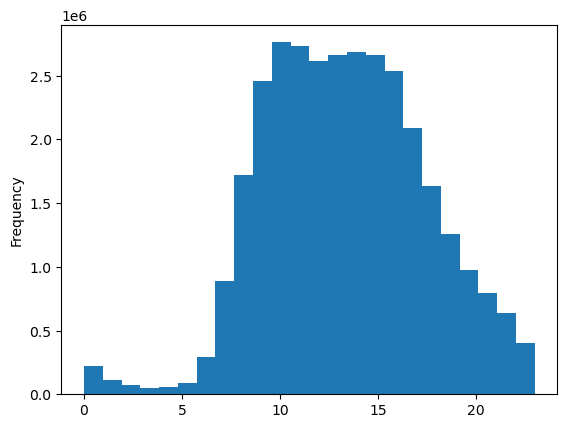

In [7]:
#histogram of order_hour_of_day
df_merged_his=df_merged['time_of_day'].plot.hist(bins = 24)

In [9]:
path_vis=r"C:\Users\galia\Instacart Basket Analysis\04 Analysis\Visualizations"

In [10]:
df_merged_his.figure.savefig(os.path.join(path_vis,'hour_of_day'))

##### This Histogram shows that the customers make more purchases from 10 am until 19 pm during the day

### The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

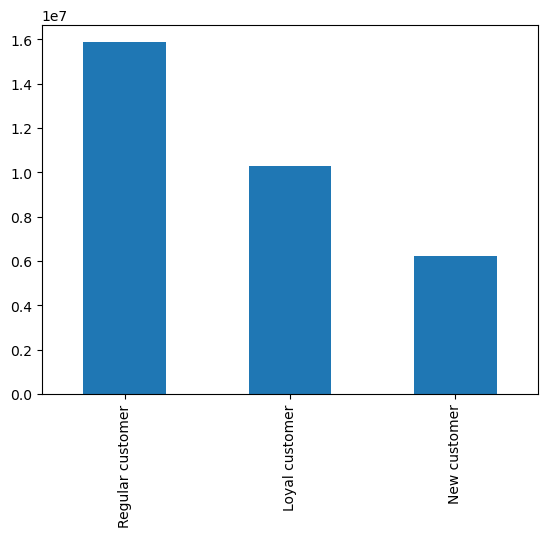

In [13]:
# creating a bar char for loyalty flag
df_merged_bar=df_merged['loyalty_flag'].value_counts().plot.bar()

### Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [5]:
#creating a sample 70/30 
np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [6]:
dev

array([False,  True, False, ...,  True,  True,  True])

##### creating the samples

In [7]:
#big sample
big = df_merged[dev]

In [8]:
#small sample

small = df_merged[~dev]

In [ ]:
#checking  lens of lists and df
len(df_merged)

In [ ]:
len(big)+len(small)

In [9]:
# reducing sample necesary columns
df_small = small[['prices','time_of_day']]

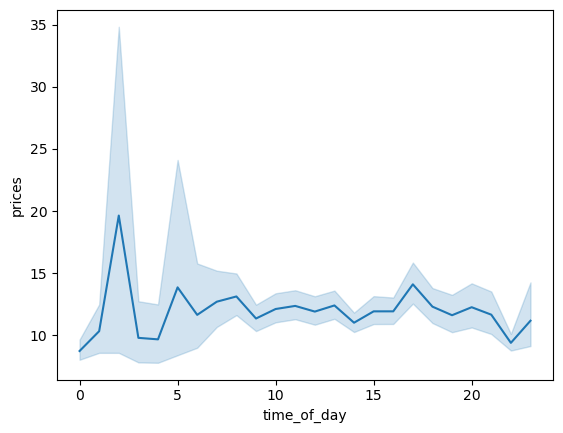

In [10]:
line = sns.lineplot(data = df_small, x = 'time_of_day',y = 'prices')

In [12]:
path_vis=r"C:\Users\galia\Instacart Basket Analysis\04 Analysis\Visualizations"

In [13]:
line.figure.savefig(os.path.join(path_vis,'time_of_dayprices'))

#### Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents: 

In [27]:
#reducing sample into required columns
df_small_age_fam=small[['Age','fam_membs']]

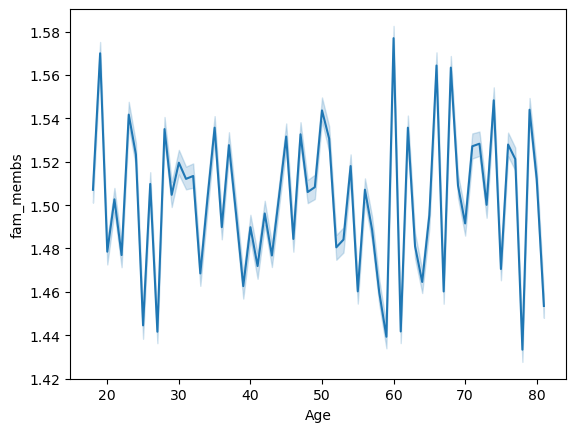

In [36]:
line_age = sns.lineplot(data = df_small_age_fam, x = 'Age',y = 'fam_membs')

### is not posible to notice any trend or relationship between age and family members

####   exporting charts

In [31]:
path_vis=r"C:\Users\galia\Instacart Basket Analysis\04 Analysis\Visualizations"

In [32]:
#exporting char for loyalty flag
df_merged_bar.figure.savefig(os.path.join(path_vis, 'loyalty_bar.png'))


In [37]:
#exporting char for prices/hour day
line.figure.savefig(os.path.join(path_vis,'hour_price_line.png'))

In [38]:
#exporting char for age/fam members
line_age.figure.savefig(os.path.join(path_vis,'age_fab_mem.png'))

#### you’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function. 

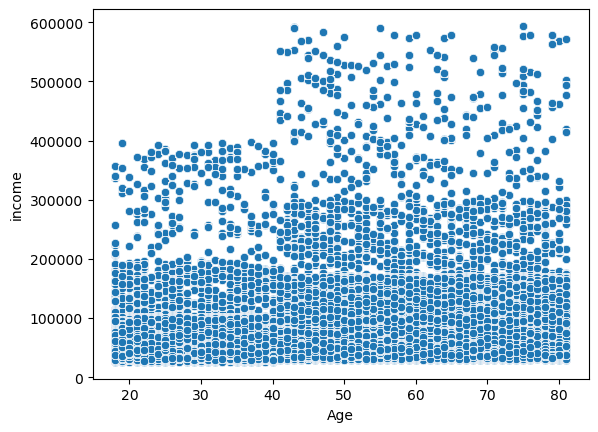

In [40]:
#creating scaatterplot
age_scatt=sns.scatterplot(x = 'Age', y = 'income',data = df_merged)

### this graph show that the df dispertion is high, but we can notice that the mayority of people are under the line of 200.000

In [41]:
#exporting age/income chart
age_scatt.figure.savefig(os.path.join(path_vis, 'age_income_scatter.png'))

#### finito!